## Sample collection

In [1]:
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Number of samples
n_samples = 100

# Parameters for the truncated normal distribution
mean = 5
std = 2  
lower, upper = 0, 10

# Generate random samples more concentrated around 5
X = truncnorm((lower - mean) / std, (upper - mean) / std, loc=mean, scale=std).rvs(n_samples)


# Generate labels
y = np.where(X > 5, 1, -1)

# Example: print the first 10 samples and their labels
for i in range(10):
    print(f"Sample: {X[i]:.2f}, Label: {y[i]}")

Sample: 4.35, Label: -1
Sample: 6.25, Label: 1
Sample: 6.65, Label: 1
Sample: 7.55, Label: 1
Sample: 3.91, Label: -1
Sample: 5.89, Label: 1
Sample: 4.81, Label: -1
Sample: 7.79, Label: 1
Sample: 5.25, Label: 1
Sample: 8.71, Label: 1


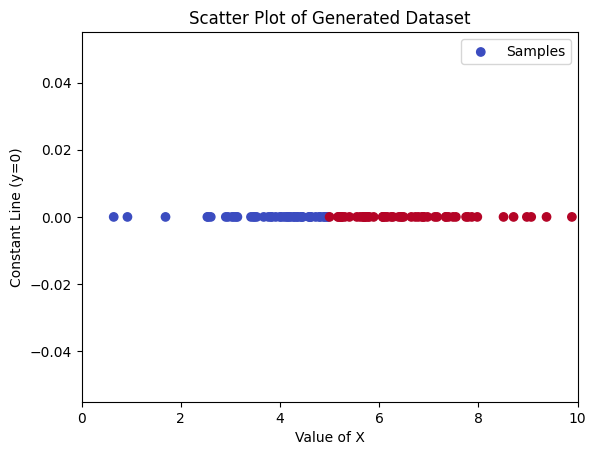

In [2]:
# Assuming X, y, and n_samples are defined

# Create a scatter plot with all points on a single line (e.g., y=0)
plt.scatter(X, [0]*len(X), c=y, cmap='coolwarm', label='Samples')

# Set the limits of the x-axis
plt.xlim(0, 10)

# Add labels and title for clarity
plt.title('Scatter Plot of Generated Dataset')
plt.xlabel('Value of X')
plt.ylabel('Constant Line (y=0)')
plt.legend()

# Display the plot
plt.show()

## Logistic regression(logistic loss)

In [3]:
## Logistic regression with L2 regularization
if X.ndim == 1:
    X = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 1.00


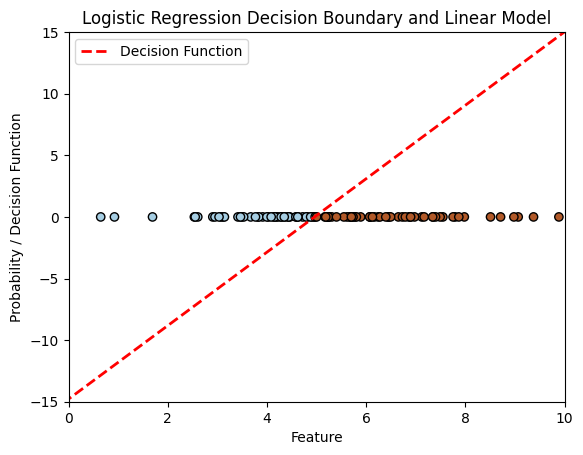

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X is your 1D feature matrix and y is the target vector

# Plot the original data points
plt.scatter(X, np.zeros_like(X), c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlim(0, 10)
plt.ylim(-15, 15)

# Generate a range of values for the feature
x_values = np.linspace(X.min() - 1, X.max() + 1, 400).reshape(-1, 1)

# Calculate the decision function for these values
# For logistic regression: z = w*x + b
z_values = np.dot(x_values, model.coef_.T) + model.intercept_

# Predict the probability for these values
y_values = model.predict_proba(x_values)[:, 1]  # Assuming a binary classification

# Plot the decision boundary (probability)
#plt.plot(x_values, y_values, color='blue', linewidth=2, label='Probability')

# Plot the underlying linear model (decision function)
plt.plot(x_values, z_values, color='red', linewidth=2, linestyle='--', label='Decision Function')

plt.title('Logistic Regression Decision Boundary and Linear Model')
plt.xlabel('Feature')
plt.ylabel('Probability / Decision Function')
plt.legend()
plt.show()

In [5]:
# Print the coefficient(s) and intercept of the model
print("Coefficient(s):", model.coef_)
print("Intercept:", model.intercept_)
x_intercept = -model.intercept_ / model.coef_[0]
print("X-intercept:", x_intercept)

Coefficient(s): [[2.98084741]]
Intercept: [-14.785436]
X-intercept: [4.9601452]


In [9]:
## Logistic regression without regularization
model = LogisticRegression(penalty=None)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 1.00


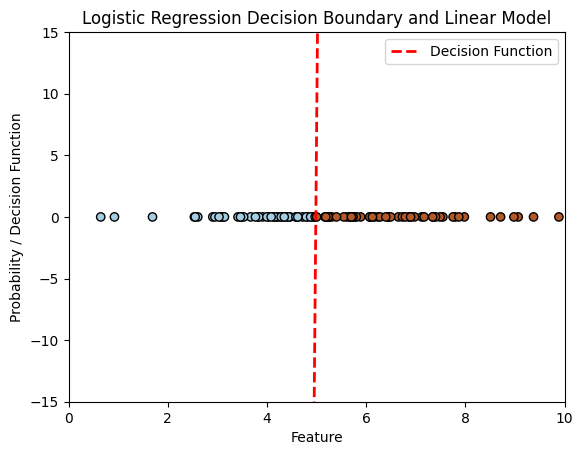

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X is your 1D feature matrix and y is the target vector

# Plot the original data points
plt.scatter(X, np.zeros_like(X), c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlim(0, 10)
plt.ylim(-15, 15)

# Generate a range of values for the feature
x_values = np.linspace(X.min() - 1, X.max() + 1, 400).reshape(-1, 1)

# Calculate the decision function for these values
# For logistic regression: z = w*x + b
z_values = np.dot(x_values, model.coef_.T) + model.intercept_

# Predict the probability for these values
y_values = model.predict_proba(x_values)[:, 1]  # Assuming a binary classification

# Plot the decision boundary (probability)
#plt.plot(x_values, y_values, color='blue', linewidth=2, label='Probability')

# Plot the underlying linear model (decision function)
plt.plot(x_values, z_values, color='red', linewidth=2, linestyle='--', label='Decision Function')

plt.title('Logistic Regression Decision Boundary and Linear Model')
plt.xlabel('Feature')
plt.ylabel('Probability / Decision Function')
plt.legend()
plt.show()

In [8]:
print("Coefficient(s):", model.coef_)
print("Intercept:", model.intercept_)
x_intercept = -model.intercept_ / model.coef_[0]
print("X-intercept:", x_intercept)

Coefficient(s): [[450.86256744]]
Intercept: [-2248.03501156]
X-intercept: [4.98607597]


## Hinge loss

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the Support Vector Classifier with a linear kernel
model = SVC(kernel='linear', C=1)  # C is the regularization parameter

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
predictions = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.2f}")

# Print the coefficient(s) and intercept of the model
print("Coefficient(s):", model.coef_)
print("Intercept:", model.intercept_)

Model accuracy: 1.00
Coefficient(s): [[2.14241663]]
Intercept: [-10.60940075]


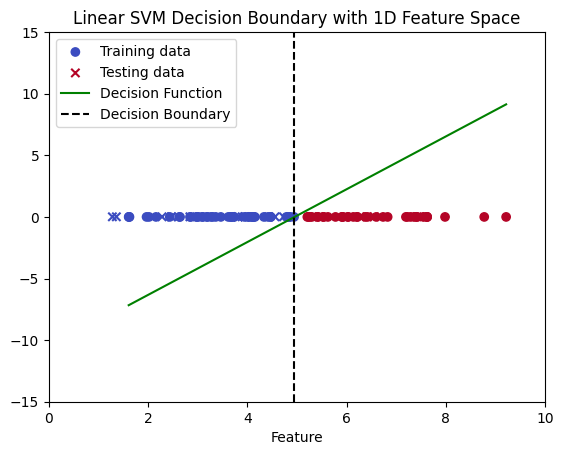

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, y_test, and model are already defined

# Plot the data points for a 1D feature space
plt.scatter(X_train, np.zeros_like(X_train), c=y_train, cmap='coolwarm', label='Training data', marker='o')
plt.scatter(X_test, np.zeros_like(X_test) + 0.01, c=y_test, cmap='coolwarm', label='Testing data', marker='x')
plt.xlim(0,10)
plt.ylim(-15,15)

# Calculate decision boundary for 1D
x_min, x_max = X_train.min(), X_train.max()
x_values = np.linspace(x_min, x_max, 300)
y_decision = model.decision_function(x_values.reshape(-1, 1))

# Plot decision function
plt.plot(x_values, y_decision, color='green', label='Decision Function')

# Find decision boundary (where decision function crosses zero)
decision_boundary_x = x_values[np.where(np.diff(np.sign(y_decision)))[0]]
for db_x in decision_boundary_x:
    plt.axvline(x=db_x, color='k', linestyle='--', label='Decision Boundary' if db_x == decision_boundary_x[0] else "")

plt.xlabel('Feature')
plt.title('Linear SVM Decision Boundary with 1D Feature Space')
plt.legend()
plt.show()

In [11]:
## SVM without soft margin
model = SVC(kernel='linear', C=1e36)  # Set C to a large value for hard margin
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 1.00


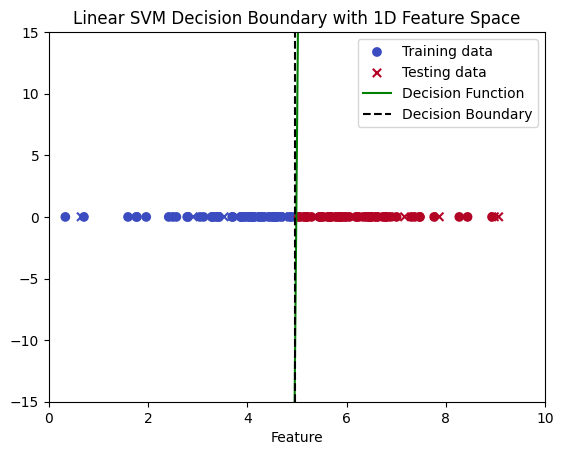

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, y_test, and model are already defined

# Plot the data points for a 1D feature space
plt.scatter(X_train, np.zeros_like(X_train), c=y_train, cmap='coolwarm', label='Training data', marker='o')
plt.scatter(X_test, np.zeros_like(X_test) + 0.01, c=y_test, cmap='coolwarm', label='Testing data', marker='x')
plt.xlim(0,10)
plt.ylim(-15,15)

# Calculate decision boundary for 1D
x_min, x_max = X_train.min(), X_train.max()
x_values = np.linspace(x_min, x_max, 300)
y_decision = model.decision_function(x_values.reshape(-1, 1))

# Plot decision function
plt.plot(x_values, y_decision, color='green', label='Decision Function')

# Find decision boundary (where decision function crosses zero)
decision_boundary_x = x_values[np.where(np.diff(np.sign(y_decision)))[0]]
for db_x in decision_boundary_x:
    plt.axvline(x=db_x, color='k', linestyle='--', label='Decision Boundary' if db_x == decision_boundary_x[0] else "")

plt.xlabel('Feature')
plt.title('Linear SVM Decision Boundary with 1D Feature Space')
plt.legend()
plt.show()

In [49]:
# Print the coefficient(s) and intercept of the model
print("Coefficient(s):", model.coef_)
print("Intercept:", model.intercept_)

Coefficient(s): [[450.86256744]]
Intercept: [-2248.03501156]


Epoch [1/250], Logistic Loss: 0.4661, Hinge Loss: 0.0000, Squared Hinge Loss: 0.0000
Epoch [2/250], Logistic Loss: 0.6272, Hinge Loss: 0.0000, Squared Hinge Loss: 0.0000
Epoch [3/250], Logistic Loss: 0.5880, Hinge Loss: 0.0000, Squared Hinge Loss: 0.0000
Epoch [4/250], Logistic Loss: 0.6038, Hinge Loss: 0.0000, Squared Hinge Loss: 0.0000
Epoch [5/250], Logistic Loss: 0.4942, Hinge Loss: 0.0000, Squared Hinge Loss: 0.0000
Epoch [6/250], Logistic Loss: 0.2673, Hinge Loss: 0.0000, Squared Hinge Loss: 0.0000
Epoch [7/250], Logistic Loss: 0.4316, Hinge Loss: 0.0000, Squared Hinge Loss: 0.0000
Epoch [8/250], Logistic Loss: 0.6901, Hinge Loss: 0.0044, Squared Hinge Loss: 0.0001
Epoch [9/250], Logistic Loss: 0.5607, Hinge Loss: 0.0000, Squared Hinge Loss: 0.0000
Epoch [10/250], Logistic Loss: 0.4039, Hinge Loss: 0.0000, Squared Hinge Loss: 0.0000
Epoch [11/250], Logistic Loss: 0.3570, Hinge Loss: 0.0000, Squared Hinge Loss: 0.0000
Epoch [12/250], Logistic Loss: 0.6621, Hinge Loss: 0.0000, Squa

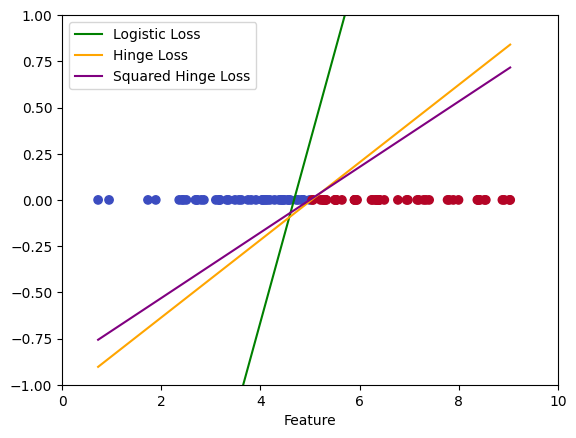

In [52]:
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Number of samples
n_samples = 100

# Parameters for the truncated normal distribution
mean = 5
std = 2  
lower, upper = 0, 10

# Generate random samples more concentrated around 5
X = truncnorm((lower - mean) / std, (upper - mean) / std, loc=mean, scale=std).rvs(n_samples)

# Generate labels
y = np.where(X > 5, 1, -1)

# Convert the training data to tensors
X_train = torch.tensor(X.reshape(-1, 1), dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Define the logistic loss
class LogisticLoss(nn.Module):
    def __init__(self):
        super(LogisticLoss, self).__init__()

    def forward(self, outputs, labels):
        return torch.mean(torch.log(1 + torch.exp(-outputs * labels)))

# Define the hinge loss
class HingeLoss(nn.Module):
    def __init__(self):
        super(HingeLoss, self).__init__()

    def forward(self, outputs, labels):
        hinge_loss = torch.clamp(0 - outputs * labels, min=0)
        return torch.mean(hinge_loss)

# Define the squared hinge loss
class SquaredHingeLoss(nn.Module):
    def __init__(self):
        super(SquaredHingeLoss, self).__init__()

    def forward(self, outputs, labels):
        hinge_loss = torch.clamp(0 - outputs * labels, min=0)
        squared_hinge_loss = hinge_loss ** 2
        return torch.mean(squared_hinge_loss)

# Define a simple linear classifier
class LinearClassifier(nn.Module):
    def __init__(self, input_dim):
        super(LinearClassifier, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

# Initialize models, loss functions, and optimizers
input_dim = X_train.shape[1]
model_logistic = LinearClassifier(input_dim)
model_hinge = LinearClassifier(input_dim)
model_squared_hinge = LinearClassifier(input_dim)

criterion_logistic = LogisticLoss()
criterion_hinge = HingeLoss()
criterion_squared_hinge = SquaredHingeLoss()

optimizer_logistic = optim.SGD(model_logistic.parameters(), lr=0.01)
optimizer_hinge = optim.SGD(model_hinge.parameters(), lr=0.01)
optimizer_squared_hinge = optim.SGD(model_squared_hinge.parameters(), lr=0.01)

# Training loop
num_epochs = 250
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Train logistic loss model
        optimizer_logistic.zero_grad()
        outputs_logistic = model_logistic(inputs).view(-1)
        loss_logistic = criterion_logistic(outputs_logistic, labels)
        loss_logistic.backward()
        optimizer_logistic.step()

        # Train hinge loss model
        optimizer_hinge.zero_grad()
        outputs_hinge = model_hinge(inputs).view(-1)
        loss_hinge = criterion_hinge(outputs_hinge, labels)
        loss_hinge.backward()
        optimizer_hinge.step()

        # Train squared hinge loss model
        optimizer_squared_hinge.zero_grad()
        outputs_squared_hinge = model_squared_hinge(inputs).view(-1)
        loss_squared_hinge = criterion_squared_hinge(outputs_squared_hinge, labels)
        loss_squared_hinge.backward()
        optimizer_squared_hinge.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Logistic Loss: {loss_logistic.item():.4f}, Hinge Loss: {loss_hinge.item():.4f}, Squared Hinge Loss: {loss_squared_hinge.item():.4f}')

# Plotting decision boundaries
def plot_decision_boundaries(models, X, y, titles):
    plt.scatter(X.numpy(), np.zeros_like(X.numpy()), c=y.numpy(), cmap='coolwarm', marker='o')
    plt.xlim(0, 10)
    plt.ylim(-1, 1)

    x_min, x_max = X.min(), X.max()
    x_values = np.linspace(x_min, x_max, 300)

    for model, title, color in zip(models, titles, ['green', 'orange', 'purple']):
        y_decision = model(torch.tensor(x_values.reshape(-1, 1), dtype=torch.float32)).detach().numpy()
        plt.plot(x_values, y_decision, color=color, label=title)
        decision_boundary_x = x_values[np.where(np.diff(np.sign(y_decision)))[0]]
        for db_x in decision_boundary_x:
            plt.axvline(x=db_x, color=color, linestyle='--')

    plt.xlabel('Feature')
    #plt.title('Decision Boundaries')
    plt.legend()
    plt.show()

models = [model_logistic, model_hinge, model_squared_hinge]
titles = ['Logistic Loss', 'Hinge Loss', 'Squared Hinge Loss']
plot_decision_boundaries(models, X_train, y_train, titles)

In [57]:
# Function to compute the slope of the decision boundary
def compute_slope(model):
    with torch.no_grad():
        weight = model.linear.weight.item()
        bias = model.linear.bias.item()
    return weight

# Compute slopes for each model
slope_logistic = compute_slope(model_logistic)
slope_hinge = compute_slope(model_hinge)
slope_squared_hinge = compute_slope(model_squared_hinge)

print(f"Slope of Logistic Loss Model: {slope_logistic:.4f}")
print(f"Slope of Hinge Loss Model: {slope_hinge:.4f}")
print(f"Slope of Squared Hinge Loss Model: {slope_squared_hinge:.4f}")

Slope of Logistic Loss Model: 0.9763
Slope of Hinge Loss Model: 0.2099
Slope of Squared Hinge Loss Model: 0.1773
